In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.utils import shuffle

In [3]:
folder_path = '/content/drive/MyDrive/Amy/MS_PCEN/DC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Amy/MS_PCEN/DC'))}")
        count = count+1
        images_as_arrays.append(img_array)

amy_images_DC = np.asarray(images_as_arrays)
amy_labels_DC = np.ones(amy_images_DC.shape[0])

The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/377_24_EI_DEPLOYMENT_20240311_125039_479_300.png is processed: 1/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240311_070820_614_1000.png is processed: 2/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240314_005256_559_900.png is processed: 3/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240318_032950_484_1500.png is processed: 4/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240311_080621_126_1010.png is processed: 5/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/377_24_EI_DEPLOYMENT_20240316_163539_736_420.png is processed: 6/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240314_125803_148_660.png is processed: 7/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/DC/374_24_EI_DEPLOYMENT_20240313_112049_149_1190.png is processed: 8/122
The data sam

In [4]:
folder_path = '/content/drive/MyDrive/Amy/MS_PCEN/NoDC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Amy/MS_PCEN/NoDC'))}")
        count = count+1
        images_as_arrays.append(img_array)

amy_images_NoDC = np.asarray(images_as_arrays)
amy_labels_NoDC = np.zeros(amy_images_NoDC.shape[0])

The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/374_24_EI_DEPLOYMENT_20240311_152125_095_1460.png is processed: 1/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/377_24_EI_DEPLOYMENT_20240316_192941_153_1180.png is processed: 2/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/377_24_EI_DEPLOYMENT_20240317_001943_517_270.png is processed: 3/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/377_24_EI_DEPLOYMENT_20240312_051647_489_1080.png is processed: 4/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/377_24_EI_DEPLOYMENT_20240316_205641_851_1140.png is processed: 5/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/374_24_EI_DEPLOYMENT_20240317_005435_951_1050.png is processed: 6/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/377_24_EI_DEPLOYMENT_20240317_053846_108_1310.png is processed: 7/122
The data sample /content/drive/MyDrive/Amy/MS_PCEN/NoDC/374_24_EI_DEPLOYMENT_20240316_004422_725_60.png is processed: 8

In [5]:
amy_data = np.concatenate((amy_images_DC, amy_images_NoDC), axis=0)
amy_labels = np.concatenate((amy_labels_DC, amy_labels_NoDC), axis=0)

In [6]:
amy_data, amy_labels = shuffle(amy_data, amy_labels, random_state=42)

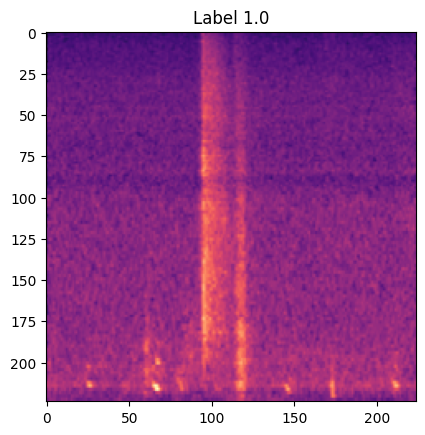

In [7]:
plt.figure()
plt.imshow(amy_data[42])
plt.title(f'Label {amy_labels[42]}')
plt.show()

In [8]:
from tensorflow.keras.models import model_from_json
"""
Load your model:
    You can load your model by following the steps below. However, please first
    follow the introduction in README.md, also see save.py shared in this repository
"""
# load json and create model
json_file = open('/content/drive/MyDrive/Amy/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Amy/model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [9]:
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,768,387 (94.48 MB)

 Trainable params: 24,715,265 (94.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 2 (12.00 B)

In [10]:
amy_predictions = loaded_model.predict(amy_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step


In [11]:
amy_predictions = amy_predictions[:,0]

In [12]:
amy_predictions[amy_predictions>=0.5]=1.0
amy_predictions[amy_predictions<0.5]=0.0

In [13]:
amy_true_false = amy_predictions==amy_labels
accuracy_amy = (len(np.where(np.reshape(amy_true_false, -1) == True)[0]))/(len(np.reshape(amy_true_false, -1)))

In [14]:
accuracy_amy

0.5286885245901639

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(amy_labels, amy_predictions)

0.5286885245901639

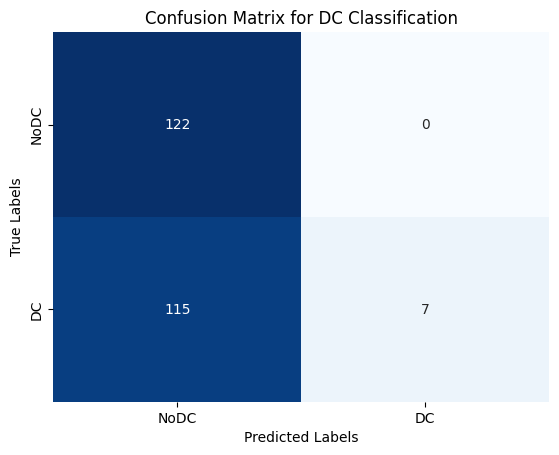

In [25]:
import seaborn as sns
cm = confusion_matrix(amy_labels, amy_predictions)
class_labels=['NoDC', 'DC']
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for DC Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
amy_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [24]:
amy_labels

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0.